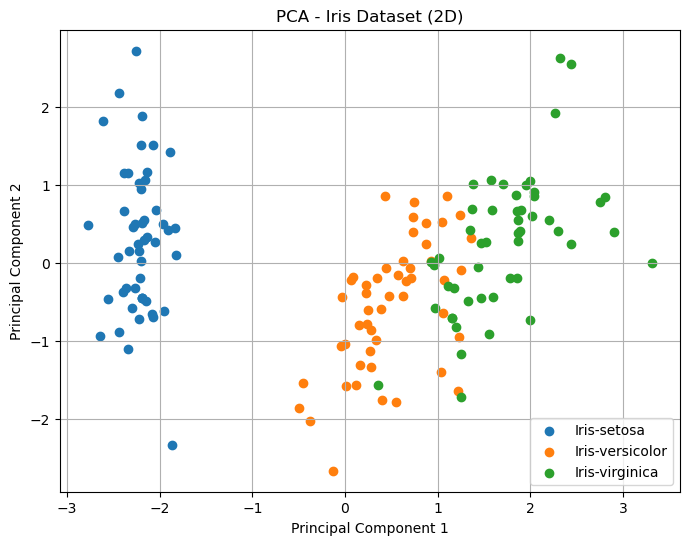

In [2]:
# Part 1: PCA Dimensionality Reduction on Iris Dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris_df = pd.read_csv("C:/Users/HP/Desktop/main flow task 7/Iris.csv")

# Drop non-feature columns
features = iris_df.drop(columns=["Id", "Species"])

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df["Species"] = iris_df["Species"]

# Scatter plot
plt.figure(figsize=(8,6))
for species in pca_df["Species"].unique():
    subset = pca_df[pca_df["Species"] == species]
    plt.scatter(subset["PC1"], subset["PC2"], label=species)

plt.title("PCA - Iris Dataset (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


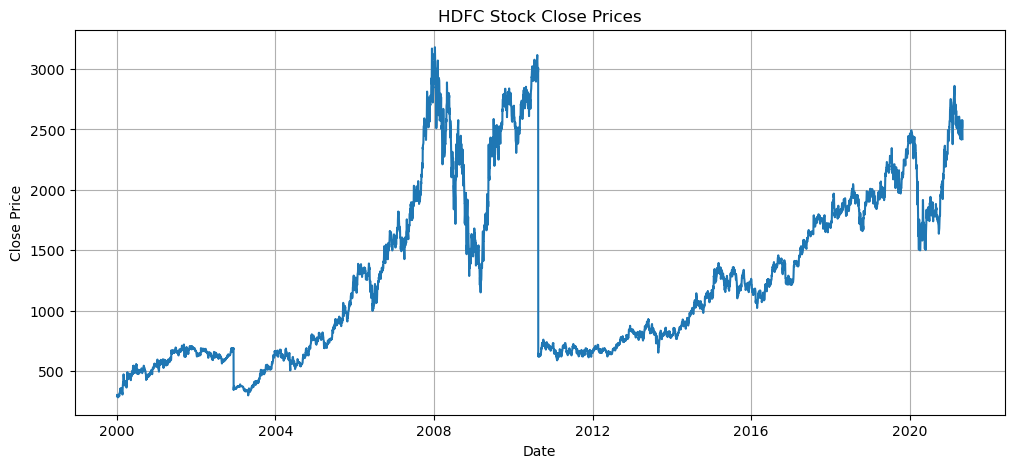

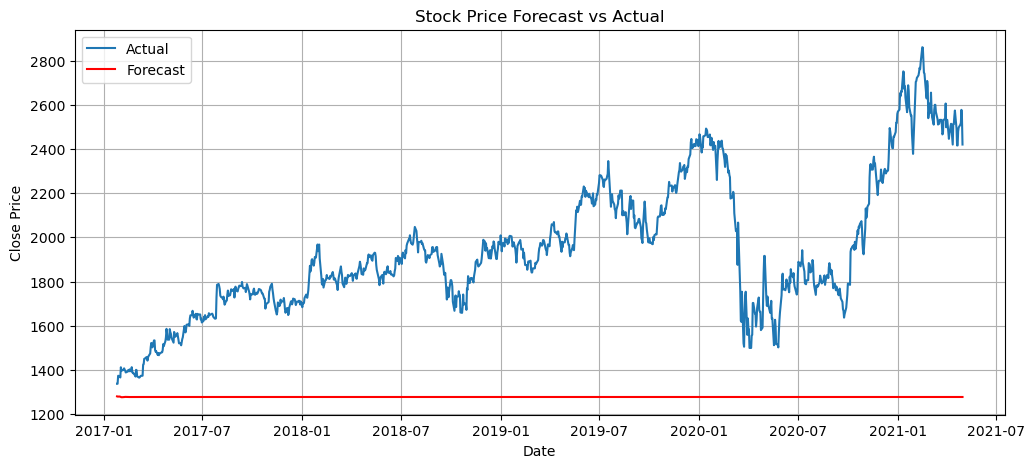

MAE: 668.24
RMSE: 735.81
MAPE: 32.75%


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load and preprocess the dataset
stock_df = pd.read_csv("C:/Users/HP/Desktop/main flow task 7/HDFC.csv")
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df.set_index('Date', inplace=True)
stock_df = stock_df[['Close']].dropna()
stock_df = stock_df.asfreq('B')  # business days frequency
stock_df = stock_df.fillna(method='ffill')  # fill any NaNs (due to holidays)

# Plot Close prices
plt.figure(figsize=(12, 5))
plt.plot(stock_df['Close'])
plt.title("HDFC Stock Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

# Train-Test Split
train_size = int(len(stock_df) * 0.8)
train = stock_df['Close'].iloc[:train_size]
test = stock_df['Close'].iloc[train_size:]

# Train ARIMA model
model = ARIMA(train, order=(5, 1, 2))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Drop any NaNs in both test and forecast just to be sure
test_clean = test.dropna()
forecast_clean = forecast.dropna()
aligned_test, aligned_forecast = test_clean.align(forecast_clean, join='inner')

# Plot Actual vs Forecast
plt.figure(figsize=(12, 5))
plt.plot(aligned_test, label='Actual')
plt.plot(aligned_forecast, label='Forecast', color='red')
plt.title("Stock Price Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

# Evaluation
mae = mean_absolute_error(aligned_test, aligned_forecast)
rmse = np.sqrt(mean_squared_error(aligned_test, aligned_forecast))
mape = np.mean(np.abs((aligned_test - aligned_forecast) / aligned_test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
